In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset .csv.csv")


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [ ]:
df.head()

,Text,Sentiment
0,Last session of the day http://twitpic.com/67ezh,1
1,Shanghai is also really exciting (precisely --...,2
2,"Recession hit Veronique Branquinho, she has to...",0
3,happy bday!,2
4,http://twitpic.com/4w75p - I like it!!,2


In [ ]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Sentiment'].value_counts()

Sentiment
1    1430
2    1103
0    1000
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3533 entries, 0 to 3533
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       3533 non-null   object
 1   Sentiment  3533 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 82.8+ KB


In [ ]:
df = df.dropna()
df.shape

(3533, 2)

In [ ]:
df['Text'] = df['Text'].str.lower()
df

,Text,Sentiment
0,last session of the day http://twitpic.com/67ezh,1
1,shanghai is also really exciting (precisely --...,2
2,"recession hit veronique branquinho, she has to...",0
3,happy bday!,2
4,http://twitpic.com/4w75p - i like it!!,2
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",0
3530,all alone in this old house again. thanks for...,2
3531,i know what you mean. my little dog is sinking...,0
3532,_sutra what is your next youtube video gonna b...,2


In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

'eleph'

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [ ]:
from typing import Pattern
import re
def remove_html_tags(text):
   pattern = re.compile('<.*?')
   return pattern.sub(r'',text)

In [ ]:
df['Text'] = df['Text'].apply(remove_html_tags)

In [ ]:
def remove_urls(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

In [ ]:
df['Text'] = df['Text'].apply(remove_urls)

In [ ]:
# Open the file
with open('/content/drive/MyDrive/slang.txt', 'r') as file:
    lines = file.readlines()

# Initialize an empty dictionary
chat_words = {}

# Iterate over each line in the file
for line in lines:
    # Split the line into key and value based on '='
    parts = line.split('=')

    # Ensure that the line contains exactly one '='
    if len(parts) == 2:
        key = parts[0].strip()   # Strip any leading/trailing whitespace from the key
        value = parts[1].strip() # Strip any leading/trailing whitespace from the value

        # Add the key-value pair to the dictionary
        chat_words[key] = value

# Print the resulting dictionary
print(chat_words)


{'AFAIK': 'As Far As I Know', 'AFK': 'Away From Keyboard', 'ASAP': 'As Soon As Possible', 'ATK': 'At The Keyboard', 'ATM': 'At The Moment', 'A3': 'Anytime, Anywhere, Anyplace', 'BAK': 'Back At Keyboard', 'BBL': 'Be Back Later', 'BBS': 'Be Back Soon', 'BFN': 'Bye For Now', 'B4N': 'Bye For Now', 'BRB': 'Be Right Back', 'BRT': 'Be Right There', 'BTW': 'By The Way', 'B4': 'Before', 'CU': 'See You', 'CUL8R': 'See You Later', 'CYA': 'See You', 'FAQ': 'Frequently Asked Questions', 'FC': 'Fingers Crossed', 'FWIW': "For What It's Worth", 'FYI': 'For Your Information', 'GAL': 'Get A Life', 'GG': 'Good Game', 'GN': 'Good Night', 'GMTA': 'Great Minds Think Alike', 'GR8': 'Great!', 'G9': 'Genius', 'IC': 'I See', 'ICQ': 'I Seek you (also a chat program)', 'ILU': 'ILU: I Love You', 'IMHO': 'In My Honest/Humble Opinion', 'IMO': 'In My Opinion', 'IOW': 'In Other Words', 'IRL': 'In Real Life', 'KISS': 'Keep It Simple, Stupid', 'LDR': 'Long Distance Relationship', 'LMAO': 'Laugh My A.. Off', 'LOL': 'Laug

In [ ]:
def chat_conversion(text):

  new_text = []
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)


In [ ]:
df['Text']=df['Text'].apply(chat_conversion)

In [ ]:
df['Transformed_text']= df['Text'].apply(transform_text)
df

,Text,Sentiment,Transformed_text
0,last session of the day,1,last session day
1,shanghai is also really exciting (precisely --...,2,shanghai also realli excit precis skyscrap gal...
2,"recession hit veronique branquinho, she has to...",0,recess hit veroniqu branquinho quit compani shame
3,happy bday!,2,happi bday
4,- i like it!!,2,like
...,...,...,...
3529,"its at 3 am, im very tired but i can`t sleep b...",0,3 im tire sleep tri
3530,all alone in this old house again. thanks for ...,2,alon old hous thank net keep aliv kick whoever...
3531,i know what you mean. my little dog is sinking...,0,know mean littl dog sink depress want move som...
3532,_sutra what is your next youtube video gonna b...,2,next youtub video gon na love video


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
negative_wc = wc.generate(df[df['Sentiment'] == 0]['Transformed_text'].str.cat(sep=" "))

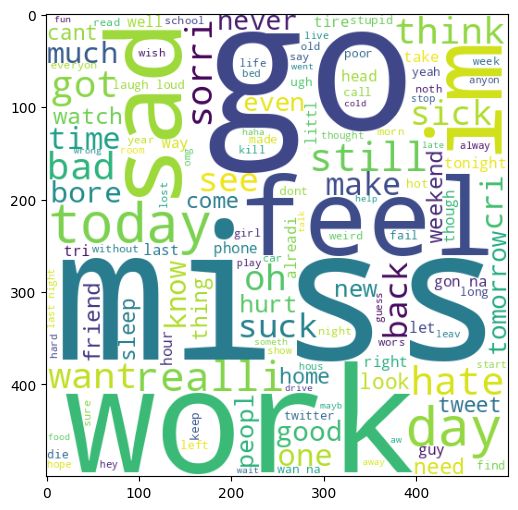

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [ ]:
nuetral_wc = wc.generate(df[df['Sentiment'] == 1]['Transformed_text'].str.cat(sep=" "))

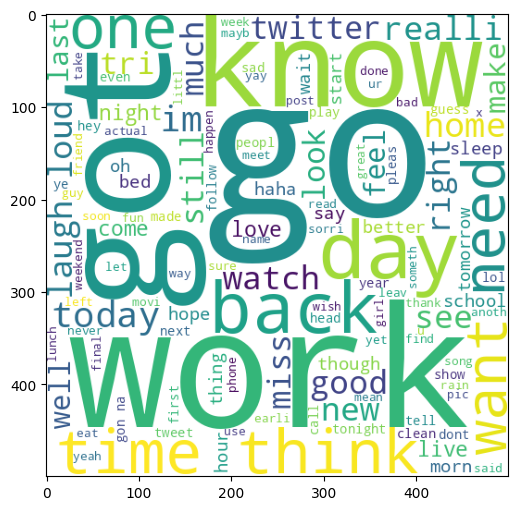

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(nuetral_wc)

In [ ]:
positive_wc = wc.generate(df[df['Sentiment'] == 2]['Transformed_text'].str.cat(sep=" "))

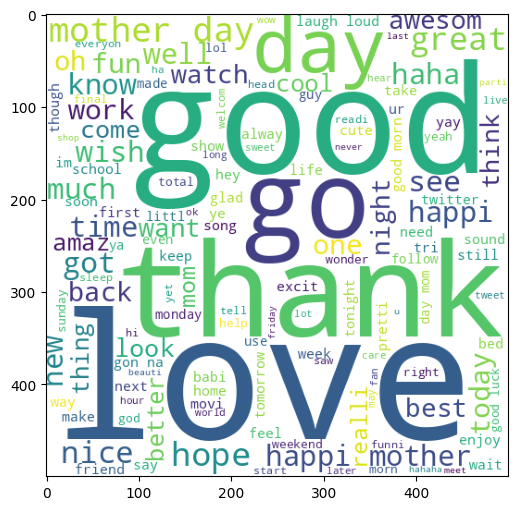

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

Model Building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=300)

In [ ]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
y = df['Sentiment'].values

In [ ]:
y

array([1, 2, 0, ..., 0, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gbdt = GradientBoostingClassifier(n_estimators=55,random_state=42)
dct = DecisionTreeClassifier(max_depth=12)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average='macro'))

0.4724186704384724
[[124  17  60]
 [102  37 136]
 [ 36  22 173]]
0.476319745452711


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average='macro'))

0.6011315417256011
[[ 80 110  11]
 [ 37 206  32]
 [ 10  82 139]]
0.6370818210924253


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))

0.6265912305516266
[[ 87 102  12]
 [ 39 210  26]
 [ 13  72 146]]
0.655417513815035


In [ ]:
dct.fit(X_train,y_train)
y_pred4 = dct.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4,average = 'macro'))

0.5502121640735502
0.7044979307741287


Checking with different machine learning algorithms


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average = 'macro')

    return accuracy,precision

In [ ]:
train_classifier(lrc,X_train,y_train,X_test,y_test)


(0.6336633663366337, 0.6697688806398868)

In [ ]:
train_classifier(dtc,X_train,y_train,X_test,y_test)

(0.5162659123055162, 0.70732074438971)

In [ ]:
train_classifier(xgb,X_train,y_train,X_test,y_test)

(0.6138613861386139, 0.657537923320597)

In [ ]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

Using Voting(merge two or more algos to get better accuracy and precision)

In [ ]:
voting = VotingClassifier(estimators=[('lr', lrc), ('gbd', gbdt), ('dt', dtc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('gbd',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('dt', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred,average='macro'))

Accuracy 0.6166902404526167
Precision 0.7061023789898532


In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.6166902404526167
Precision -  0.6561703575167467
For  KN
Accuracy -  0.4214992927864215
Precision -  0.6182716049382716
For  NB
Accuracy -  0.5869872701555869
Precision -  0.6441378782085949
For  DT
Accuracy -  0.512022630834512
Precision -  0.6933217772101087
For  LR
Accuracy -  0.6336633663366337
Precision -  0.6984243643169573
For  RF
Accuracy -  0.6223479490806223
Precision -  0.6668889765851093
For  AdaBoost
Accuracy -  0.611032531824611
Precision -  0.6460002119000252
For  BgC
Accuracy -  0.6237623762376238
Precision -  0.6481243007217034
For  ETC
Accuracy -  0.6421499292786421
Precision -  0.6551827480356397
For  GBDT
Accuracy -  0.6053748231966054
Precision -  0.6959713008010221
For  xgb
Accuracy -  0.6237623762376238
Precision -  0.6842948717948718


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
4,LR,0.633663,0.698424
9,GBDT,0.605375,0.695971
3,DT,0.512023,0.693322
10,xgb,0.623762,0.684295
5,RF,0.622348,0.666889
0,SVC,0.616690,0.656170
8,ETC,0.642150,0.655183
7,BgC,0.623762,0.648124
6,AdaBoost,0.611033,0.646000
2,NB,0.586987,0.644138


I got better precision and accuracy in 'bnb', so i'm picking that model for pipeline creation

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))